In [31]:
import pandas as pd
import numpy as np

# Syntax
## Creating DataFrames

1. 딕셔너리 형태로 만들기 (키값이 컬럼이 된다. 위에서 아래로 벡터 삽입하는 느낌)

In [37]:
df = pd.DataFrame({

    'a': [4, 5, 6],
    'b': [7, 8, 9],
    'c': [10, 11, 12]},
    index = [1, 2, 3]
)
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


2. 인덱스 순서로 만들기

In [6]:
df = pd.DataFrame([
    [4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]],
    columns = ['a', 'b', 'c'],
    index = [1, 2, 3]
)
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


**3. Multiindex**

In [12]:
df = pd.DataFrame({
    'a': [4, 5, 6],
    'b': [7, 8, 9],
    'c': [10, 11, 12]},
    index = pd.MultiIndex.from_tuples([('d', 1), ('d', 2), ('e', 2)],
                                     names=['n', 'v'])
)
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

4. Melt

var_id라는 기준을 지정하면 나머지 컬럼들이 행으로 중복되서 들어가고 각각 옆에 해당 값이 써진다.

In [16]:
# 데이터 생성
data = pd.DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],

'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],

'pch_cnt' : [1, 2, 3, 4],

'pch_amt' : [100, 200, 300, 400]})

In [17]:
# 데이터 확인
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [35]:
# id_vars가 기준

pd.melt(data, id_vars=['cust_ID', 'prd_CD'],
       var_name='pch_CD', value_name='pch_value')

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


sort_values

시리즈의 정렬뿐만 아니라 데이터프레임의 정렬도 가능(열 기준)


In [40]:
# 시리즈의 정렬
df['a'].sort_values()

1    4
2    5
3    6
Name: a, dtype: int64

In [41]:
# 프레임의 정렬
df.sort_values('a')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


df.drop

In [45]:
# c를 대괄호로 안해도 된다 하나일 경우는.
df.drop(['c'], axis=1)

,a,b
1,4,7
2,5,8
3,6,9


groupby, pivot_table

pivot은 형태만 바꾸는데, pivot_table은 값을 계산한다는 차이점이 있다.

In [47]:
df.groupby(['a'])['b'].agg(['mean', 'sum', 'count'])

,mean,sum,count
a,,,
4,7,7,1
5,8,8,1
6,9,9,1


In [48]:
df.groupby(['a'])['b'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [52]:
# pivot_table의 그룹핑을 a를 기준으로 하는 것. 계산 agg_func은 디폴트가 mean이다.
# values는 나타내고자 하는 컬럼이다.
pd.pivot_table(df, index='a', values=['b', 'c']) 

,b,c
a,,
4,7,10
5,8,11
6,9,12


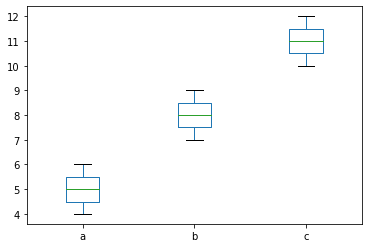

In [59]:
df.plot.box()